# Assignment 1 -- Insights from Overwatch League

## 76 total marks

In [1]:
# You will need the following packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Introduction

**Business Context.** You work for Overwatch League, the premier esports league for the game Overwatch. They have collected data about past pro tournaments and would like you to answer some questions about past tournaments. Build visualizations and answer the questions below. 

**About Overwatch League.** In the Overwatch League, teams of professional players compete against each other to be the best in the world at playing the team-based first-person shooter game, Overwatch.

Each match consists of two teams of six players each, with each player selecting one of the game's many heroes to play as. The teams are then tasked with completing various objectives, such as escorting a payload across the map or capturing and holding control points.

The team that is able to complete their objectives the quickest or prevent the other team from completing their objectives wins the match.

Matches are typically played in a best-of-three format, meaning that the first team to win two rounds is declared the winner. Each round is called a "map", and the team that wins the most maps wins the match.

The Overwatch League is divided into two seasons per year, with teams from all around the world competing in a variety of different venues. The top teams from each season advance to the playoffs, where they compete for the chance to be crowned the Overwatch League champion. Each map is one of two types, it is either a control map or an escort map.  

**Business Problem.** Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.

- **Analytical Context.** You are given a CSV file (stored in the already created ```data``` folder) containing details about each match like winning team, map type, date of match, tournament title, etc. 
You will be performing the following tasks on the data:

1. Read, transform, and prepare data for visualization
2. Perform analytics and construct visualizations of the data to identify patterns in the dataset
        
The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these.

# Question 1 -- loading in and getting an overview (5 marks)

**1a) (1 mark)**  Use the pandas function ```read_csv()``` to load the file ```match_map_stats.csv``` as a DataFrame. Name this DataFrame ```df```. 

In [2]:
with open('data/match_map_stats.csv') as f:
    df=pd.read_csv(f, delimiter=',')

**1b) (1 mark)** Print the first 5 rows of the DataFrame

In [3]:
df.head(5)

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,01/11/18 00:12,01/11/18 00:20,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,Los Angeles Valiant,San Francisco Shock,75.61505,0.00000,0.000000,240.000,NaN,NaN,2,0
1,01/11/18 00:22,01/11/18 00:27,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,Los Angeles Valiant,San Francisco Shock,75.64960,75.61505,125.750570,0.000,NaN,NaN,3,2
2,01/11/18 00:34,01/11/18 00:38,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,250.492000,240.000,NaN,NaN,2,0
3,01/11/18 00:40,01/11/18 00:44,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,225.789030,250.492,NaN,NaN,2,2
4,01/11/18 00:46,01/11/18 00:49,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,36.396057,250.492,NaN,NaN,4,2


**1c) (1 mark)** Print the column names in `df`

In [4]:
df.columns

Index(['round_start_time', 'round_end_time', 'stage', 'match_id',
       'game_number', 'match_winner', 'map_winner', 'map_loser', 'map_name',
       'map_round', 'winning_team_final_map_score',
       'losing_team_final_map_score', 'control_round_name', 'Attacker',
       'Defender', 'team_one_name', 'team_two_name',
       'attacker_payload_distance', 'defender_payload_distance',
       'attacker_time_banked', 'defender_time_banked',
       'attacker_control_perecent', 'defender_control_perecent',
       'attacker_round_end_score', 'defender_round_end_score'],
      dtype='object')

We have the following columns

- **round_start_time** Stating time of the round
- **round_end_time** Ending time of the round
- **stage** Stage of the competition
- **match_id** Id for the match
- **game_number** Game number in the given match
- **match_winner** Winner of the match
- **map_winner** Winner of the game/map
- **map_loser** Lost of the game/map
- **map_name** Name of map
- **map_round** Round number (each map has several rounds)
- **winning_team_final_map_score** Final score of map winner
- **losing_team_final_map_score** Final score of map loser
- **control_round_name** Name of the round if it was a control type map
- **attacker** Team that was the attacker
- **defender** Team that was the defender
- **team_one_name** Name of first team in match
- **team_two_name** Name of second team in match
- **attacker_payload_distance** Distance the attacker moved the payload on payload maps
- **defender_payload_distance** 
- **attacker_time_banked** Attacker time left over
- **defender_time_banked** Defender time left over
- **attacker_control_perecent** Percent objective was charged by the attacker team
- **defender_control_perecent** Percent objective was charged by the defender team
- **attacker_round_end_score** Attacker score at the end of this round
- **defender_round_end_score** Defender score at the end of this round

**1d) (2 marks)** Answer the folowing question:

Overwatch is aiming to expand their fanbase through the following advertising campaigns:

- [ ] Advertising the most popular teams
- [ ] Promoting a rematch between last years best teams
- [ ] Creating an underdog story by highlighting last years worst performing teams
- [ ] Which demographics are more likely to buy tickets?

Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.

**Note:** You can create check marks by double-clicking this cell and adding an ```[x]``` in the corresponding lines. 

**Answer.**

- [ ] Advertising the most popular teams
- [x] Promoting a rematch between last years best teams
- [x] Creating an underdog story by highlighting last years worst performing teams
- [ ] Which demographics are more likely to buy tickets?


# Question 2 -- Cleaning the data (5 marks) 

In this dataset there are two types of maps, escort and control. On control maps, the teams try to control an objective until the meter reaches 100. On escort maps, the attacker tries to escort a payload to the end of the map, while the defender tries to stop it. Control maps can be found in the dataset by rows where the `control_perecent` is not 0 for at least one team. 
- 2a) **(1 marks)** Create a variable for map type called map_type, which has two possible values "control" and "escort". 
- 2b) **(2 marks)** For rows which correspond to control maps, set the time_banked and payload distance values to `NaN`. 
- 2c) **(2 marks)** Ensure that `round_start_time` and `round_end_time` time variables are in the `date_time` format and create a variable called `year` which contains the year the match took place

In [5]:
#2a 
print(df['attacker_control_perecent'].unique())
is_control=df['attacker_control_perecent'].apply(np.isnan)
df['map_type']=df['attacker_control_perecent'].apply(lambda x: 'escort' if np.isnan(x) else 'control')
df.head(10)

[ nan  99. 100.  58.  35.   0.  24.  33.  41.  86.  78.  38.  40.  89.
  94.  13.  70.  21.  81.  80.  51.  44.  56.  45.  20.  66.  47.  96.
  95.  69.  29.  82.  64.  57.  15.  84.  48.  46.  34.  62.  83.  65.
  87.  75.  92.  42.  26.  30.  67.  68.  59.  53.  37.  19.  63.  73.
  39.  88.   6.  72.  85.  18.  61.  93.  60.  52.  50.  76.  31.  28.
  91.  23.  98.  90.  55.  17.  49.  36.  54.  11.  43.   7.  79.  25.
  74.  16.  97.  10. 101.  71.  32.  27.  22.   9.  77.  14.   8.  12.]


,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score,map_type
0,01/11/18 00:12,01/11/18 00:20,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,San Francisco Shock,75.61505,0.00000,0.000000,240.000000,NaN,NaN,2,0,escort
1,01/11/18 00:22,01/11/18 00:27,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,San Francisco Shock,75.64960,75.61505,125.750570,0.000000,NaN,NaN,3,2,escort
2,01/11/18 00:34,01/11/18 00:38,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,San Francisco Shock,0.00000,0.00000,250.492000,240.000000,NaN,NaN,2,0,escort
3,01/11/18 00:40,01/11/18 00:44,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,San Francisco Shock,0.00000,0.00000,225.789030,250.492000,NaN,NaN,2,2,escort
4,01/11/18 00:46,01/11/18 00:49,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,San Francisco Shock,0.00000,0.00000,36.396057,250.492000,NaN,NaN,4,2,escort
5,01/11/18 00:51,01/11/18 00:56,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,4,...,San Francisco Shock,0.00000,0.00000,0.000000,36.396057,NaN,NaN,3,4,escort
6,01/11/18 01:11,01/11/18 01:16,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,1,...,San Francisco Shock,0.00000,0.00000,0.000000,0.000000,99.0,100.0,0,1,control
7,01/11/18 01:17,01/11/18 01:20,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,2,...,San Francisco Shock,0.00000,0.00000,0.000000,0.000000,100.0,0.0,1,1,control
8,01/11/18 01:20,01/11/18 01:25,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,3,...,San Francisco Shock,0.00000,0.00000,0.000000,0.000000,100.0,65.0,2,1,control
9,01/11/18 01:32,01/11/18 01:39,2018: Stage 1,10223,4,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Numbani,1,...,San Francisco Shock,75.54951,0.00000,0.000000,0.000000,NaN,NaN,1,0,escort


In [6]:
#2b answers will vary

# one solution

columns=['attacker_payload_distance','defender_payload_distance','attacker_time_banked','defender_time_banked']
df.loc[df['map_type']=='control',columns]=np.nan
df.head(10)
df.tail(10)

## another solution
columns=['attacker_payload_distance','defender_payload_distance','attacker_time_banked','defender_time_banked']
control=df[df['map_type']=='control'].copy()
escort=df[df['map_type']!='control'].copy()
control[columns]=np.nan
df=pd.concat([control,escort])
print(df.head(10))
df.tail(10)


# # another advanced solution
def clean_pd(raw_value,map_type):
    if map_type=='control':
        return float("NaN")
    else:
        return raw_value

    
df['attacker_payload_distance']=df.apply(lambda x: clean_pd(x.attacker_payload_distance, x.map_type), axis=1)  
df['defender_payload_distance']=df.apply(lambda x: clean_pd(x.defender_payload_distance, x.map_type), axis=1)  
df['attacker_time_banked']=df.apply(lambda x: clean_pd(x.attacker_time_banked, x.map_type), axis=1)  
df['defender_time_banked']=df.apply(lambda x: clean_pd(x.defender_time_banked, x.map_type), axis=1)  
df.head(10)
df.tail(10)


   round_start_time  round_end_time          stage  match_id  game_number  \
6    01/11/18 01:11  01/11/18 01:16  2018: Stage 1     10223            3   
7    01/11/18 01:17  01/11/18 01:20  2018: Stage 1     10223            3   
8    01/11/18 01:20  01/11/18 01:25  2018: Stage 1     10223            3   
15   01/11/18 02:52  01/11/18 02:58  2018: Stage 1     10224            3   
16   01/11/18 02:59  01/11/18 03:03  2018: Stage 1     10224            3   
27   01/11/18 04:56  01/11/18 05:00  2018: Stage 1     10225            3   
28   01/11/18 05:00  01/11/18 05:04  2018: Stage 1     10225            3   
37   01/11/18 22:58  01/11/18 23:03  2018: Stage 1     10226            3   
38   01/11/18 23:04  01/11/18 23:11  2018: Stage 1     10226            3   
45   01/12/18 00:46  01/12/18 00:49  2018: Stage 1     10227            3   

              match_winner              map_winner            map_loser  \
6      Los Angeles Valiant     Los Angeles Valiant  San Francisco Shock   
7 

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score,map_type
13669,10/16/22 19:25,10/16/22 19:32,2022: Countdown Cup: Qualifiers,39328,2,Boston Uprising,Boston Uprising,Paris Eternal,King's Row,1,...,Paris Eternal,78.548900,0.000000,0.000000,0.000000,NaN,NaN,1,0,escort
13670,10/16/22 19:34,10/16/22 19:36,2022: Countdown Cup: Qualifiers,39328,2,Boston Uprising,Boston Uprising,Paris Eternal,King's Row,2,...,Paris Eternal,78.552260,78.548900,251.216000,0.000000,NaN,NaN,2,1,escort
13671,10/16/22 19:43,10/16/22 19:50,2022: Countdown Cup: Qualifiers,39328,3,Boston Uprising,Boston Uprising,Paris Eternal,Junkertown,1,...,Boston Uprising,101.875440,0.000000,62.493988,0.000000,NaN,NaN,3,0,escort
13672,10/16/22 19:51,10/16/22 19:56,2022: Countdown Cup: Qualifiers,39328,3,Boston Uprising,Boston Uprising,Paris Eternal,Junkertown,2,...,Boston Uprising,89.731010,101.875440,0.000000,62.493988,NaN,NaN,0,3,escort
13673,10/16/22 20:04,10/16/22 20:14,2022: Countdown Cup: Qualifiers,39328,4,Boston Uprising,Boston Uprising,Paris Eternal,New Queen Street,1,...,Paris Eternal,54.775136,99.889672,0.000000,0.000000,NaN,NaN,0,1,escort
13676,10/16/22 20:54,10/16/22 21:02,2022: Countdown Cup: Qualifiers,39329,2,Toronto Defiant,Toronto Defiant,Houston Outlaws,King's Row,1,...,Toronto Defiant,68.234150,0.000000,0.000000,0.000000,NaN,NaN,2,0,escort
13677,10/16/22 21:04,10/16/22 21:12,2022: Countdown Cup: Qualifiers,39329,2,Toronto Defiant,Toronto Defiant,Houston Outlaws,King's Row,2,...,Toronto Defiant,64.088520,68.234150,0.000000,0.000000,NaN,NaN,2,3,escort
13678,10/16/22 21:20,10/16/22 21:25,2022: Countdown Cup: Qualifiers,39329,3,Toronto Defiant,Toronto Defiant,Houston Outlaws,Dorado,1,...,Houston Outlaws,81.318504,0.000000,0.000000,0.000000,NaN,NaN,0,0,escort
13679,10/16/22 21:26,10/16/22 21:29,2022: Countdown Cup: Qualifiers,39329,3,Toronto Defiant,Toronto Defiant,Houston Outlaws,Dorado,2,...,Houston Outlaws,81.322710,81.318504,64.900010,0.000000,NaN,NaN,1,0,escort
13680,10/16/22 21:37,10/16/22 21:48,2022: Countdown Cup: Qualifiers,39329,4,Toronto Defiant,Toronto Defiant,Houston Outlaws,Colosseo,1,...,Toronto Defiant,65.214136,65.642726,0.000000,0.000000,NaN,NaN,1,0,escort


In [7]:
#2c
# Ensure that `round_start_time` and `round_end_time` time variables are in the `date_time` format. 
df['round_start_time']=pd.to_datetime(df['round_start_time'])
df['round_end_time']=pd.to_datetime(df['round_start_time'])
print(df['round_start_time'])
print(df['round_end_time'])
#note that dtype: datetime64[ns] 

# one solution 
df['year']=df['round_end_time'].apply(lambda x: str(x)[0:4])
# print(df['year'])
df.head()

# another solution
df['year']=df['round_end_time'].apply(lambda x: x.year)
df.head()

6       2018-01-11 01:11:00
7       2018-01-11 01:17:00
8       2018-01-11 01:20:00
15      2018-01-11 02:52:00
16      2018-01-11 02:59:00
                ...        
13676   2022-10-16 20:54:00
13677   2022-10-16 21:04:00
13678   2022-10-16 21:20:00
13679   2022-10-16 21:26:00
13680   2022-10-16 21:37:00
Name: round_start_time, Length: 13681, dtype: datetime64[ns]
6       2018-01-11 01:11:00
7       2018-01-11 01:17:00
8       2018-01-11 01:20:00
15      2018-01-11 02:52:00
16      2018-01-11 02:59:00
                ...        
13676   2022-10-16 20:54:00
13677   2022-10-16 21:04:00
13678   2022-10-16 21:20:00
13679   2022-10-16 21:26:00
13680   2022-10-16 21:37:00
Name: round_end_time, Length: 13681, dtype: datetime64[ns]


,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score,map_type,year
6,2018-01-11 01:11:00,2018-01-11 01:11:00,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,1,...,NaN,NaN,NaN,NaN,99.0,100.0,0,1,control,2018
7,2018-01-11 01:17:00,2018-01-11 01:17:00,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,2,...,NaN,NaN,NaN,NaN,100.0,0.0,1,1,control,2018
8,2018-01-11 01:20:00,2018-01-11 01:20:00,2018: Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,3,...,NaN,NaN,NaN,NaN,100.0,65.0,2,1,control,2018
15,2018-01-11 02:52:00,2018-01-11 02:52:00,2018: Stage 1,10224,3,Los Angeles Gladiators,Los Angeles Gladiators,Shanghai Dragons,Ilios,1,...,NaN,NaN,NaN,NaN,99.0,100.0,0,1,control,2018
16,2018-01-11 02:59:00,2018-01-11 02:59:00,2018: Stage 1,10224,3,Los Angeles Gladiators,Los Angeles Gladiators,Shanghai Dragons,Ilios,2,...,NaN,NaN,NaN,NaN,58.0,100.0,0,2,control,2018


# Question 3 --  Win rates on control maps (14 marks) 

3a) **(2 marks)** Create and print a sorted list of the unique teams. Store this list in a variable called `teams`. 

In [8]:
#one way to do it
teams=list(df['team_one_name'].unique()) + list(df['team_two_name'].unique())
teams=list(set(teams))
teams.sort()

#another way to do it
teams=[]
for i in df['team_one_name'].unique():
    if i not in teams:
          teams.append(i)
for i in df['team_two_name'].unique():
    if i not in teams:
          teams.append(i)


teams.sort()


# teams=list(df['team_one_name'].unique()) + list(df['team_two_name'].unique())
# teams=teams.unique()
# teams.sort()
teams

['Atlanta Reign',
 'Boston Uprising',
 'Chengdu Hunters',
 'Dallas Fuel',
 'Florida Mayhem',
 'Guangzhou Charge',
 'Hangzhou Spark',
 'Houston Outlaws',
 'London Spitfire',
 'Los Angeles Gladiators',
 'Los Angeles Valiant',
 'New York Excelsior',
 'Paris Eternal',
 'Philadelphia Fusion',
 'San Francisco Shock',
 'Seoul Dynasty',
 'Shanghai Dragons',
 'Toronto Defiant',
 'Vancouver Titans',
 'Washington Justice']

3b) **(1 marks)** Create and print a dictionary called `country` with team names as keys and their corresponding country as the entries. 

In [9]:
country = {'Atlanta Reign': 'USA','Boston Uprising': 'USA','Dallas Fuel': 'USA','Florida Mayhem': 'USA','Houston Outlaws': 'USA','Los Angeles Gladiators': 'USA',
          'Los Angeles Valiant': 'USA','New York Excelsior': 'USA','Philadelphia Fusion': 'USA','San Francisco Shock': 'USA','Washington Justice': 'USA',
          'Chengdu Hunters': 'China','Guangzhou Charge': 'China','Hangzhou Spark': 'China','Shanghai Dragons': "China", 'London Spitfire': 'England',
           'Paris Eternal':  'France','Seoul Dynasty':  'Korea','Toronto Defiant':  'Canada', 'Vancouver Titans':  'Canada'} 

print(country)

# OR do this
country = {} 
# iterating through the elements of list to create keys with empty values
for i in teams:
    country[i] = None

country['Atlanta Reign']=country['Boston Uprising']=country['Dallas Fuel']=country['Florida Mayhem']=country['Houston Outlaws']=country['Los Angeles Gladiators']='USA'
country['Los Angeles Valiant']=country['New York Excelsior']=country['Philadelphia Fusion']=country['San Francisco Shock']=country['Washington Justice']='USA'
country['Chengdu Hunters']=country['Guangzhou Charge']=country['Hangzhou Spark']=country['Shanghai Dragons']='China'
country['London Spitfire']='England'
country['Paris Eternal']='France'
country['Seoul Dynasty']='Korea'
country['Toronto Defiant']=country['Vancouver Titans']='Canada'

print(country)

{'Atlanta Reign': 'USA', 'Boston Uprising': 'USA', 'Dallas Fuel': 'USA', 'Florida Mayhem': 'USA', 'Houston Outlaws': 'USA', 'Los Angeles Gladiators': 'USA', 'Los Angeles Valiant': 'USA', 'New York Excelsior': 'USA', 'Philadelphia Fusion': 'USA', 'San Francisco Shock': 'USA', 'Washington Justice': 'USA', 'Chengdu Hunters': 'China', 'Guangzhou Charge': 'China', 'Hangzhou Spark': 'China', 'Shanghai Dragons': 'China', 'London Spitfire': 'England', 'Paris Eternal': 'France', 'Seoul Dynasty': 'Korea', 'Toronto Defiant': 'Canada', 'Vancouver Titans': 'Canada'}
{'Atlanta Reign': 'USA', 'Boston Uprising': 'USA', 'Chengdu Hunters': 'China', 'Dallas Fuel': 'USA', 'Florida Mayhem': 'USA', 'Guangzhou Charge': 'China', 'Hangzhou Spark': 'China', 'Houston Outlaws': 'USA', 'London Spitfire': 'England', 'Los Angeles Gladiators': 'USA', 'Los Angeles Valiant': 'USA', 'New York Excelsior': 'USA', 'Paris Eternal': 'France', 'Philadelphia Fusion': 'USA', 'San Francisco Shock': 'USA', 'Seoul Dynasty': 'Korea

A team's win rate is the number of games won divided by the total number of games played
1. 3c) **(1 marks)** Subset the DataFrame so that it contains only the control maps.
2. 3d) **(5 marks)** Make a horizontal bar chart displaying the win rate on control maps of each team, order the bar chart from lowest win rate to highest win rate, add a vertical line at 50%. Color the teams by country. 
3. 3e) **(2 marks)** What teams have the top three win rates? Do some countries produce better teams than others? Why or why not?


In [10]:

#3c
control=df[df['map_type']=='control'].copy()



Florida Mayhem            0.389522
Philadelphia Fusion       0.502783
London Spitfire           0.432432
Shanghai Dragons          0.516569
Boston Uprising           0.444181
Houston Outlaws           0.488789
Dallas Fuel               0.526205
Los Angeles Valiant       0.475638
San Francisco Shock       0.597806
New York Excelsior        0.537975
Seoul Dynasty             0.575342
Los Angeles Gladiators    0.567951
Washington Justice        0.407407
Chengdu Hunters           0.485955
Paris Eternal             0.397260
Atlanta Reign             0.556701
Guangzhou Charge          0.487578
Vancouver Titans          0.458472
Toronto Defiant           0.504587
Hangzhou Spark            0.527697
Name: overall, dtype: float64


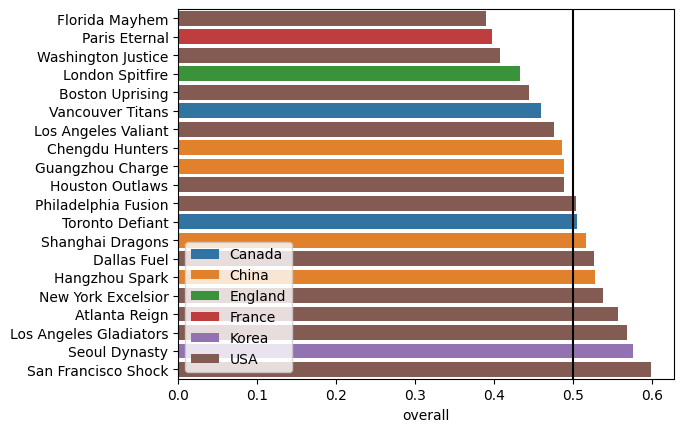

In [11]:
# 3d 

#step 1 
# get total losses, wins for each team
losses=control["map_loser"].value_counts()
wins=control["map_winner"].value_counts()
#get total games played for each team since there are draws as well: 
total1=control["team_one_name"].value_counts()
total2=control["team_two_name"].value_counts()
total=losses.copy()
for team in teams: 
    total[team]=total1[team]+total2[team]
# print(wins)
# print(total)



# # make a copy of the losses data frame, which will be the dataframe for our win rates, 
win_rate=losses.copy()
# the column name is renamed to overall for overall win rate
win_rate.rename('overall', inplace = True)

# # for each team
for team in teams: 
    #compute the win rate, wins/(losses+wins+draws}, 
    wr=wins[team]/total[team]
    # set the win rate for that team
    win_rate[team]=wr
    

print(win_rate)

#convert to dataframe from series
win_rate=pd.DataFrame(win_rate)

#add country
win_rate['country']=[country[x] for x in list(win_rate.index)]



#this is for keeping the color for each country consistent accross different bar plots with the same teams, this isn't necessary
sorted_countries=win_rate['country'].unique()
sorted_countries.sort()
hue_order=sorted_countries


# #make a column for team if you want, not necessary
# win_rate['team']=win_rate.index


########## Plotting 
win_rate=win_rate.sort_values('overall')
barplot=sns.barplot(data=win_rate, y=win_rate.index, x='overall',hue='country', orient = 'h',dodge=False,hue_order=hue_order)
barplot.legend(loc='lower left')
barplot.axvline(0.5,color='black')
plt.show()


3e) Note these answers will vary. 
- LA Gladiators, Seoul Dynasty, and SF Shock have the top three win rates. 
- It seems like the Korean team is very good, but since there is only one team from Korea, this does not indicate Korea produces good teams. The countries with more than one team seem to be dispersed above and below 50%, indicating the country where the team was created does not influnce the win rate of the team. 

3f) **(3 marks)** Make the same plot for each year - are the yearly plots similar to the overall plot? 

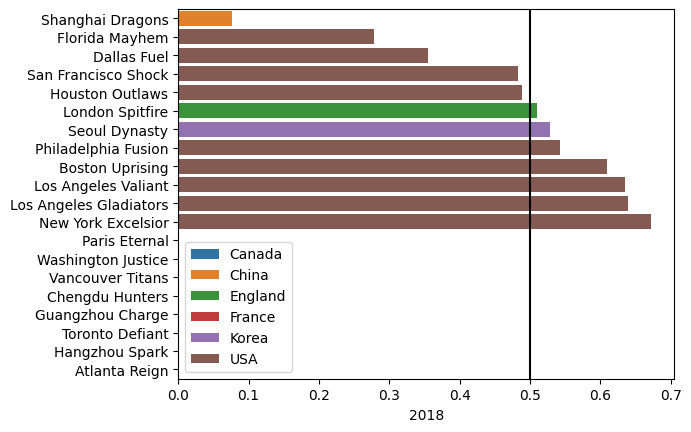

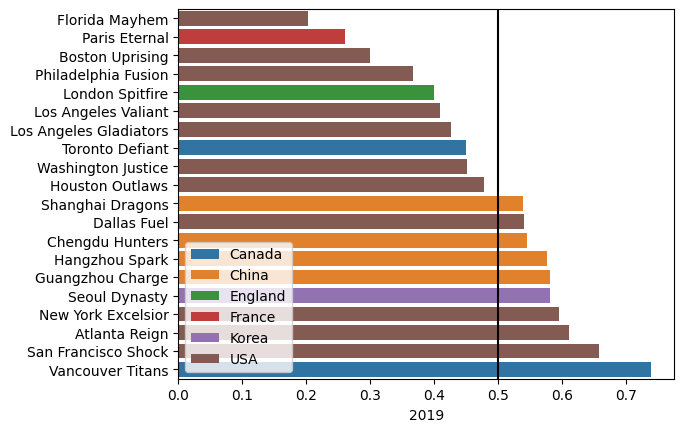

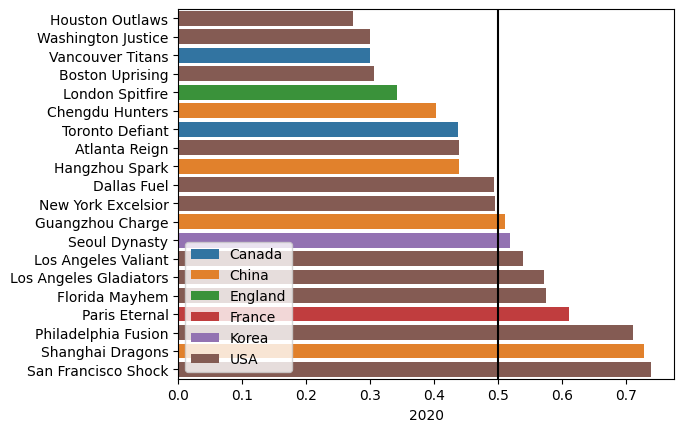

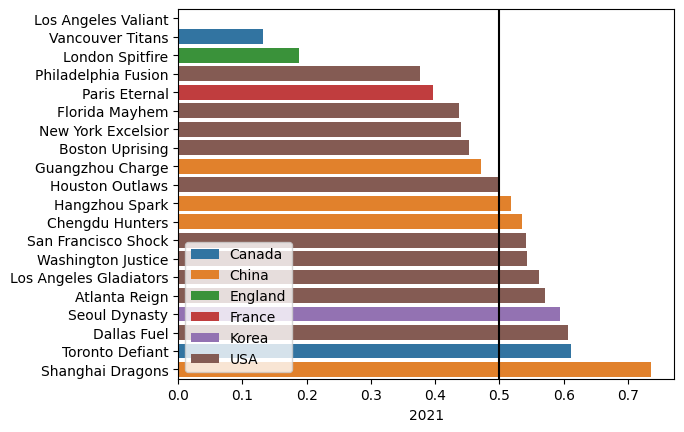

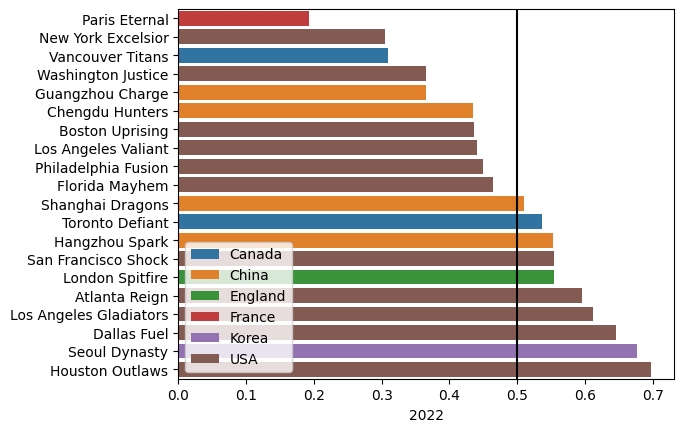

In [12]:
#3f)
# function that takes a dataframe for a year and computes the win rate you could just put this directly in the loop
def get_wr(df_year):
    #same as win rate calculation above
    win_rate=losses.copy()
    losses_year=df_year["map_loser"].value_counts()
    wins_year=df_year["map_winner"].value_counts()
    total1_yr=df_year["team_one_name"].value_counts()
    total2_yr=df_year["team_two_name"].value_counts()
    #get the teams that played this year, like in question 2
    teams_this_year=list(df_year['team_one_name'].unique()) + list(df_year['team_two_name'].unique())
    teams_this_year=set(teams_this_year)
    #compute win rate
    for team in teams: 
        if team in teams_this_year:
            if team not in list(wins_year.index):
                wins_year[team]=0
            wr=wins_year[team]/(total1_yr[team]+total2_yr[team])
            win_rate[team]=wr
        #if they didnt play that year set win rate to Nan
        else:
            win_rate[team]=float('NaN')
    return win_rate


#use groupby to get a dataframe for each year, and then loop through those dataframes to get the win rate by year

control=df[df['map_type']=='control']
losses_by_yr=control.groupby('year')
for yrs in losses_by_yr:
    win_rate[yrs[0]]= get_wr(yrs[1])


# plot for each year
    
for year in control['year'].unique():
    curr=win_rate.sort_values(year)
    # print(curr.head())
    barplot=sns.barplot(data=curr, y=curr.index, x=year,hue='country', orient = 'h',dodge=False,hue_order=hue_order)
    barplot.legend(loc='lower left')
    barplot.axvline(0.5,color='black')
    plt.show()


3f) Note these answers will vary.  The plots are not similar, the top teams vary by year. 

# Question 4 -- Win rates over time (17 marks)

- 4a) **(3 marks)** Make a line of the Shanghai Dragons' win rate on control maps over time. 
- 4b) **(1 marks)** How would describe the Shanghai Dragons' win rate on control maps over time?
- 4c) **(3 marks)** For each team who had a win rate on control maps in the top 5 in 2022, plot their win rates on control maps over time. 
- 4d) **(2 marks)** Make two observations about these plots. 

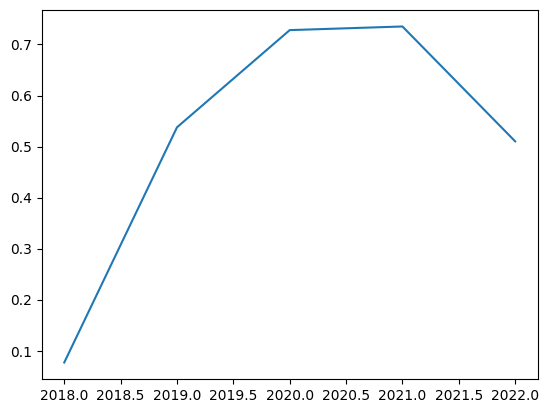

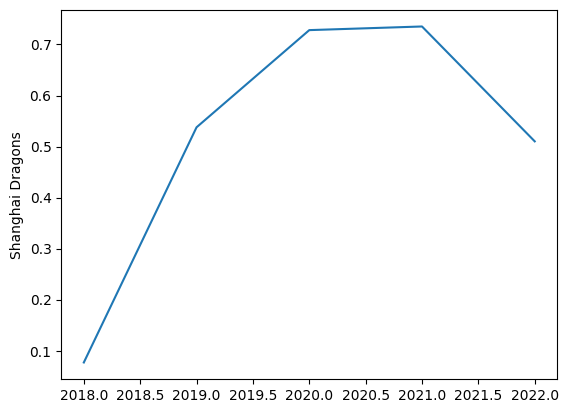

In [13]:
#4a)


wr2=win_rate.drop(['overall','country'],axis=1)
wr2.loc['Shanghai Dragons'].plot()
plt.show()

# Or 
wr3=wr2.transpose()
SD=pd.DataFrame(wr3['Shanghai Dragons'])
sns.lineplot(data=SD,x=SD.index,y='Shanghai Dragons')
plt.show()


4b) Note these answers will vary. They started off with a terrible performance, and then had three very good years and did not perform as well last year. 

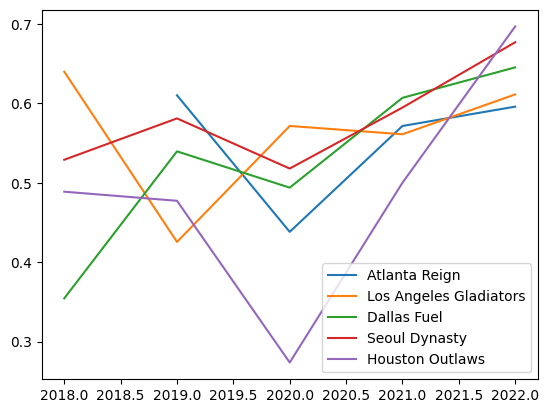

In [14]:
# 4c
top_teams=list(wr2[2022].sort_values().index)[-5:]
top_teams
for team in top_teams:
    wr2.loc[team].plot()
plt.legend()
plt.show()

4d) Note these answers will vary. 
- The Houston Outlaws Have a variable win rate
- Four out of 5 of these teams are based in the USA

- 4e) **(5 marks)** Instead of control maps, make a bar chart of the teams' win rates on the escort maps in 2022, i.e., consider only escort maps which occured in 2022 when computing this win rate. Make the same chart without subsetting to 2022, i.e., compute the escort map win rate for each team using maps which took place in any year. For example, the win rate chart on escort maps for 2022 should look like the following: <img src="WRE.png" alt="drawing" width="500"/> Note that the vertical line at 50 is useful but not necessary. 
- 4f) **(3 marks)** Compare the 2022 win rates on control maps to those on the escort maps. What do you observe?


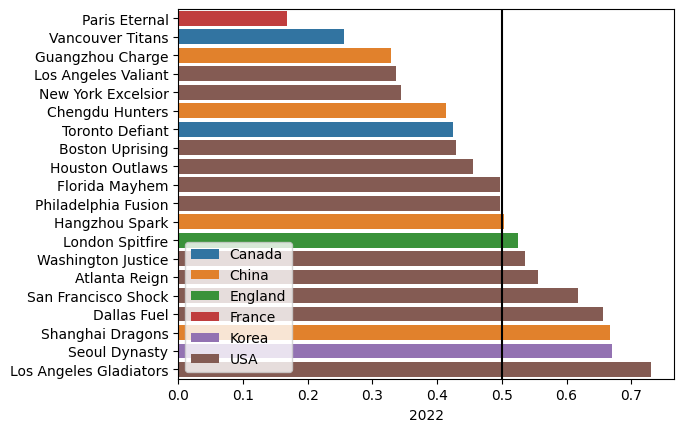

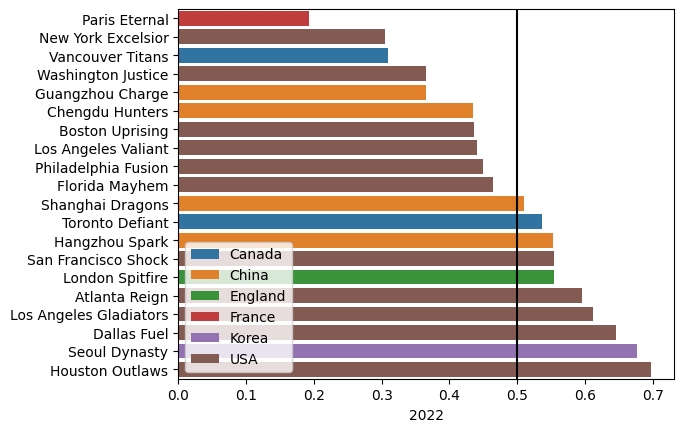

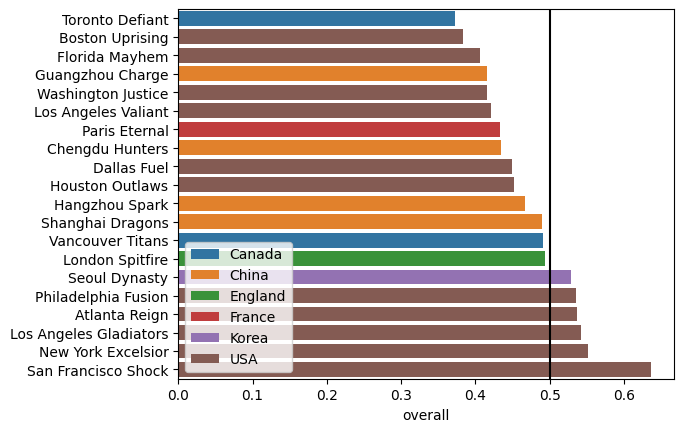

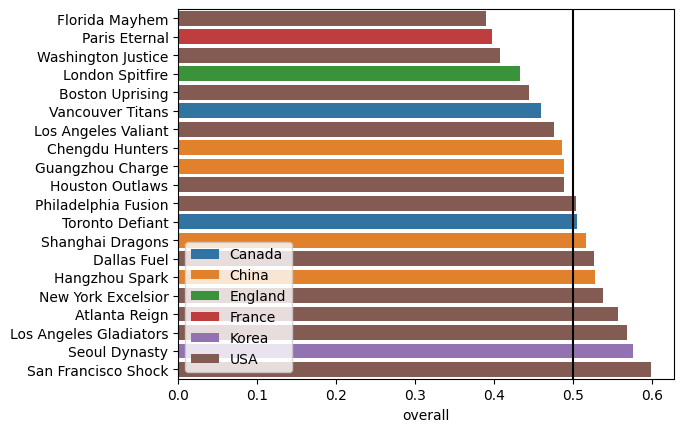

In [15]:
# 4e)
escort=df[df['map_type']=='escort']

escort.head()

draws=escort[escort["map_winner"]=='draw']
draws
#compute number of draws per team
d1=draws["team_one_name"].value_counts()
d2=draws["team_two_name"].value_counts()
for team in teams:
    if team not in d1.index:
        d1[team]=0
    if team not in d2.index:
        d2[team]=0

draws=d2+d1

losses=escort["map_loser"].value_counts()
wins=escort["map_winner"].value_counts()
wins.drop('draw',inplace=True)
losses.drop('draw',inplace=True)

win_rate_escort=losses.copy()
win_rate_escort.rename('overall', inplace = True)


for team in teams: 
    # print(team+str(losses.loc[team])+str(wins.loc[team]))
    # print(losses.loc[team]+wins.loc[team])
    wr=wins.loc[team]/(losses.loc[team]+wins.loc[team]+draws.loc[team])
    # print(wr)
    win_rate_escort.loc[team]=wr
    

# print(win_rate_escort)
win_rate_escort=pd.DataFrame(win_rate_escort)
win_rate_escort
win_rate_escort['country']=[country[x] for x in list(win_rate_escort.index)]
# win_rate_escort['country']



# sort by overall win rate
win_rate_escort=win_rate_escort.sort_values('overall')


losses_by_yr=escort.groupby('year')
losses_by_yr["map_winner"]
for yrs in losses_by_yr:
    win_rate_escort[yrs[0]]= get_wr(yrs[1])

# print(win_rate_escort)


#############  Plotting
 
year=2022
curr=win_rate_escort.sort_values(year)
curr2=win_rate.sort_values(year)

#Escort
barplot=sns.barplot(data=curr, y=curr.index, x=year,hue='country', orient = 'h',dodge=False,hue_order=hue_order)
barplot.legend(loc='lower left')
barplot.axvline(0.5,color='black')
plt.show()

#Control
barplot=sns.barplot(data=curr2, y=curr2.index, x=year,hue='country', orient = 'h',dodge=False,hue_order=hue_order)
barplot.legend(loc='lower left')
barplot.axvline(0.5,color='black')
plt.show()

year='overall'
curr=win_rate_escort.sort_values(year)
curr2=win_rate.sort_values(year)


#Escort
barplot=sns.barplot(data=curr, y=curr.index, x='overall',hue='country', orient = 'h',dodge=False,hue_order=hue_order)
barplot.legend(loc='lower left')
barplot.axvline(0.5,color='black')
plt.show()

#Control
barplot=sns.barplot(data=curr2, y=curr2.index, x='overall',hue='country', orient = 'h',dodge=False,hue_order=hue_order)
barplot.legend(loc='lower left')
barplot.axvline(0.5,color='black')
plt.show()



4f) Note these answers will vary. The best teams on control maps are not necessarily the best teams on escort maps. Seoul seems to be good at both recently. 

# Question 5 --  What map should Toronto work on improving? (18 marks)

Suppose you have been contracted as an analyst for the Toronto Defiant team. 

- 5a) **(5 marks)**  There are different types of control maps, which can be found in the `control_round_name` column. Make a bar chart of Toronto's win rate on each individual control map (can be found in `control_round_name`) for 2022 and all time. For example, your plot might look like: 
<img src="WRTD.png" alt="drawing" width="500"/>
- 5b) **(5 marks)** Which plot should be used to make reccommendations for Toronto in 2023? Based on this judgement and the plot you generated, what map should Toronto practice the most? Are there any problems with this analysis?
- 5c) **(2 marks)**  Assign each team a rank according to their 2022 control map win rate, with 1 being the highest win rate on control maps in 2022 and 20 being the lowest win rate on control maps in 2022. Print each team name with its rank beside it. 
- 5d) **(3 marks)** Determine Toronto's three best and three worst control map names (by win rate) in 2022. Print the mean rank of the teams Toronto played for each of these maps. 
- 5e) **(3 marks)** Compare the mean ranks on Toronto's best maps to their worst maps. What does this analysis reveal about Toronto's map-specific win rates?

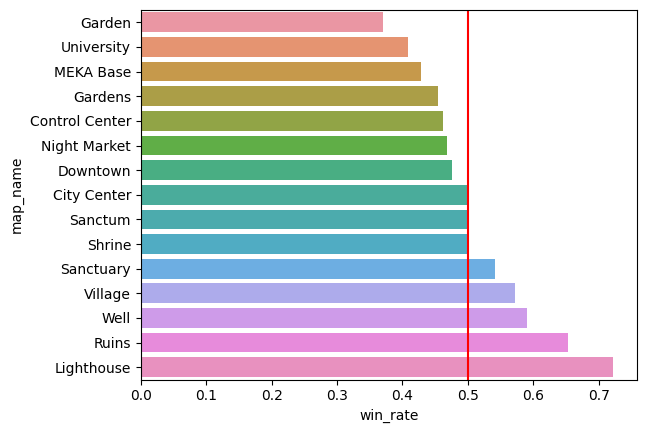

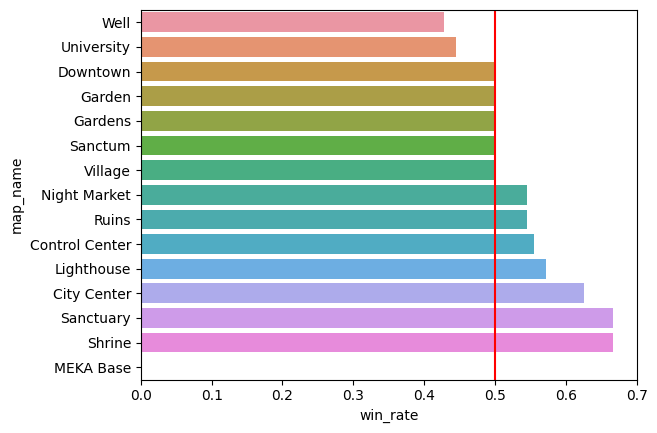

In [16]:
#5a 
Toronto_Wins=control[control['map_winner']=='Toronto Defiant']
Toronto_Loss=control[control['map_loser']=='Toronto Defiant']
Toronto=pd.concat([Toronto_Wins,Toronto_Loss])
Toronto.head()

#################################################################
wins=Toronto_Wins.groupby('control_round_name').count()
wins=wins['round_start_time']
losses=Toronto_Loss.groupby('control_round_name').count()
losses=losses['round_start_time']
losses.rename('num_losses', inplace = True)
wins.rename('num_wins', inplace = True)
t_by_map=pd.concat([wins,losses],axis=1)


t_by_map['win_rate']=t_by_map['num_wins']/(t_by_map['num_wins']+t_by_map['num_losses'])
t_by_map['map_name']=t_by_map.index
t_by_map=t_by_map.sort_values('win_rate')

barplot=sns.barplot(data=t_by_map, y='map_name', x='win_rate', orient = 'h',dodge=False)
barplot.axvline(0.5,color='red')
plt.show()


Toronto_Wins_2022=Toronto_Wins[Toronto_Wins['year']==2022]
Toronto_Loss_2022=Toronto_Loss[Toronto_Loss['year']==2022]
Toronto_2022=pd.concat([Toronto_Wins_2022,Toronto_Loss_2022])



wins=Toronto_Wins_2022.groupby('control_round_name').count()
wins=wins['round_start_time']

losses=Toronto_Loss_2022.groupby('control_round_name').count()
losses=losses['round_start_time']
losses.rename('num_losses', inplace = True)


wins.rename('num_wins', inplace = True)
t_by_map=pd.concat([wins,losses],axis=1)


t_by_map['win_rate']=t_by_map['num_wins']/(t_by_map['num_wins']+t_by_map['num_losses'])
t_by_map['map_name']=t_by_map.index
t_by_map=t_by_map.sort_values('win_rate')

barplot=sns.barplot(data=t_by_map, y='map_name', x='win_rate', orient = 'h',dodge=False)
barplot.axvline(0.5,color='red')
plt.show()


5b) Note these answers will vary. They should use their 2022 performance, the team has likely changed over the years and their most recent performance indicates the current state of their team. They should practice Well, it is their worst map. One problem is that there may be a confounder; it is possible Toronto played better teams on the maps they did poorly on and good teams on the maps they performed well on. 

In [17]:
# 5c)
ranks=(-win_rate[2022]).sort_values().rank()
print(ranks)

Houston Outlaws            1.0
Seoul Dynasty              2.0
Dallas Fuel                3.0
Los Angeles Gladiators     4.0
Atlanta Reign              5.0
London Spitfire            6.0
San Francisco Shock        7.0
Hangzhou Spark             8.0
Toronto Defiant            9.0
Shanghai Dragons          10.0
Florida Mayhem            11.0
Philadelphia Fusion       12.0
Los Angeles Valiant       13.0
Boston Uprising           14.0
Chengdu Hunters           15.0
Guangzhou Charge          16.5
Washington Justice        16.5
Vancouver Titans          18.0
New York Excelsior        19.0
Paris Eternal             20.0
Name: 2022, dtype: float64


In [18]:
#5d)
def get_mean_rank(mapp):
    opponent=Toronto_2022[Toronto_2022['control_round_name']==mapp][['map_winner','map_loser']]
    opponent=opponent.apply(lambda x: x.map_winner if x.map_winner!='Toronto Defiant' else x.map_loser,axis=1)
    opponent=pd.DataFrame(opponent)
    opponent.index=opponent[0]
    opponent['rank']=ranks[list(opponent[0])]
    return opponent['rank'].mean()

print('low win rate')
for i in range(0,3):
    print(round(get_mean_rank(t_by_map.iloc[i]['map_name'])))
    
print('high win rate')
for i in range(t_by_map.shape[0]-3,t_by_map.shape[0]):
    print(round(get_mean_rank(t_by_map.iloc[i]['map_name'])))

low win rate
11
10
5
high win rate
4
15
1


5e) Note these answers will vary. 
It seems like Toronto played better teams on their highest win rate maps, indicating they may actually be even better at their top maps than indicated by the bar chart. Map specific win rates may be confounded with the teams that the main team played. 

# Question 6 -- (9 marks) 

The league is considering changing the rules if too many matches (>5\%) end in a draw. The league organizers consider draws to be bad for the game. 

- 6a) **(3 marks)** What proportion of escort maps end in a draw?
- 6b) **(6 marks)** Make a bar plot of number of draws by map name. Do certain escort maps have more draws? What proportion of draws happen on the maps with the two highest number of draws -- what would you tell the league organisers concerning this proportion?

Draw Percent 3.84



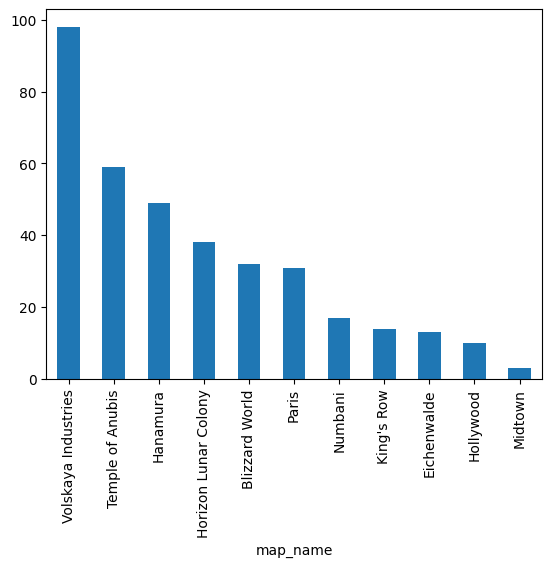

Percent of Draws 43.13



In [19]:
#6a)
draw=df[df['map_winner']=='draw']
print("Draw Percent "+str(round((draw.shape[0]/escort.shape[0])*100,2))+"\n")
draw
draws=draw[['map_name']].groupby('map_name').value_counts().sort_values(ascending=False)
draws.plot(kind='bar')
plt.show()
print("Percent of Draws "+str(round((draws[0:2].sum()/draws.sum())*100,2))+"\n")

6b) Note these answers will vary. 

It seems like an unusual amount of draws happen on the top two maps (Temple and Volskaya), relative to the rest of the maps. The league may want to investigate why draws happen so much on theese maps. 

# Question 7 -- (8 marks) 

On escort maps, the attacker must push a "payload" a certain distance within an alotted time. If the attacker pushes the payload to the end of the map before the alotted time is up, then the attacker can bank that time. On the other hand, if the attacker does not push the payload to the end of the map, the distance they were able to push it is recorded. 

- 7a) **(4 marks)** On maps where the attacker won the round, print the summary statistics of the `attacker_time_banked` column, along with a histogram of the `attacker_time_banked` column. On maps where the attacker lost the round, print the summary statistics of the `attacker_payload_distance` column, along with a histogram of the `attacker_payload_distance` column. 
- 7b) **(4 marks)** Describe what the histrogram and summary statistics tell us about the data. 

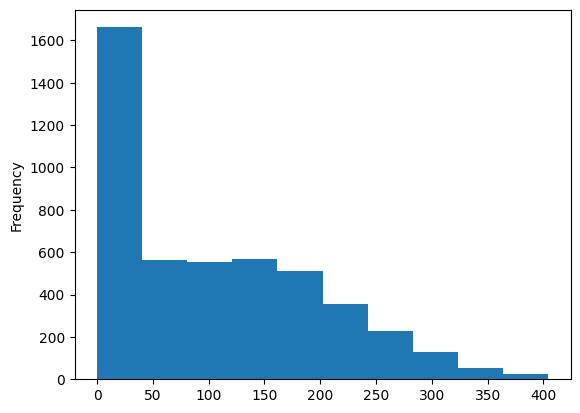

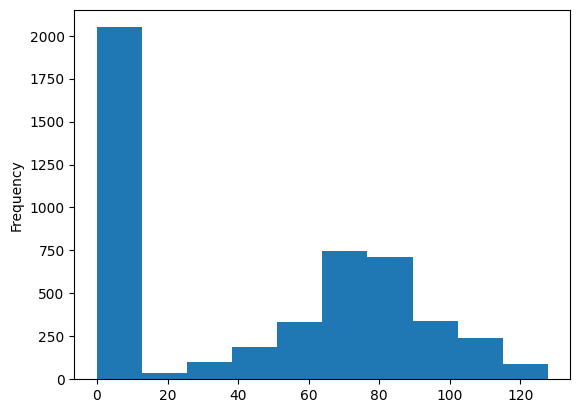

count    4650.000000
mean      102.680841
std        94.727551
min         0.000000
25%         0.000000
50%        89.320032
75%       172.368532
max       404.037000
Name: attacker_time_banked, dtype: float64
count    4837.000000
mean       44.180321
std        41.113007
min         0.000000
25%         0.000000
50%        53.503113
75%        79.922066
max       127.754380
Name: attacker_payload_distance, dtype: float64


In [20]:
#7a
# escort['attacker_payload_distance'].plot(kind='hist')
# plt.show()
mask=escort.loc[:,'Attacker']==escort.loc[:,'map_winner']
escort_aw=escort[mask]
# escort['Attacker_won']
escort_aw['attacker_time_banked'].plot(kind='hist')
plt.show()



mask2=escort.loc[:,'Attacker']!=escort.loc[:,'map_winner']
escort_al=escort[mask2]
escort_al['attacker_payload_distance'].plot(kind='hist')
plt.show()

print(escort_aw['attacker_time_banked'].describe())
print(escort_al['attacker_payload_distance'].describe())
# escort_al[['attacker_payload_distance','attacker_round_end_score']]

7b) Note these answers will vary. 

- Both histrograms have a spike at 0, representing the games where no time was banked/the payload was either pushed all the way *or* the zeroes are entered as missing/not applicable values. This has skewed the summary statistics! 
- For non-zero entries, the payload distance is symmetric with a mean around 80. Meaning that if the payload is moved, then it is moved 80 on average. The time banked is assymteric, with a flat ridge below 150.